# FINAL PROJECT 4
# Clutering Data Credit Card
Anggota Kelompok 8:
- Rijal Muhammad Farizky
- Diva Nabila

## Project Overview

### Latar Belakang
Dalam dunia bisnis keuangan, terutama pada industri kartu kredit, pemahaman yang mendalam terhadap perilaku pengguna kartu kredit sangat penting. Data transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan dapat memberikan wawasan berharga terkait tren pengeluaran, pola belanja, dan kebiasaan pengguna kartu kredit. Melalui analisis data ini, kita dapat mengidentifikasi kelompok pengguna dengan perilaku serupa, memahami preferensi mereka, dan meningkatkan layanan dan strategi pemasaran yang disesuaikan.
### Tujuan
1. Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
2. Mampu mempersiapkan data untuk digunakan dalam Clustering
3. Mampu mengimplementasikan Clustering pada data yang diberikan

## Pustaka Yang Digunakan

In [437]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
import warnings
import pickle

In [438]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

## Data Loading
Load Dataset

In [439]:
df = pd.read_csv('../dataset/CC GENERAL.csv')

Row and Column of Dataset

In [440]:
df.shape

(8950, 18)

Dataset memiliki dimensi (baris, kolom): `(8950, 18)`. Selanjutnya melihat 5 data teratas dari dataset.

In [441]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Berdasarkan output terdapat 8950 entries data dengan 18 kolom. Dari 18 kolom tersebut, 2 kolom di antaranya masih memiliki missing value, yaitu `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT`.

# Data Cleaning

### Examine Duplicated Data

Pertama, kita memeriksa duplikasi data.

In [447]:
df.duplicated().sum()

0

Tidak terdapat duplikasi data pada keseluruhan dataset, selanjutnya kita memeriksa missing value pada tiap kolom.

### Examining Missing Value

In [444]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Berdasarkan output terdapat data yang hilang pada `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT`. Untuk kolom `CREDIT_LIMIT` yang hanya berjumlah satu, dilakukan penghapusan baris.

### Handling Missing Value

Selanjutnya pada kolom `MINIMUM_PAYMENTS` DAM `CREDIT_LIMIT` dilakukan analisis distribusi data sebelum dilakukan pengisian data yang hilang.

<Axes: xlabel='MINIMUM_PAYMENTS'>

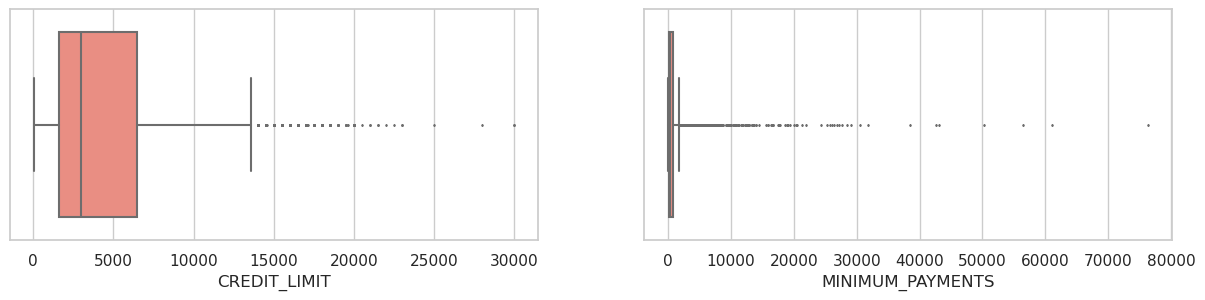

In [445]:
fig, axs = plt.subplots(1,2,figsize=(15, 3))
sns.boxplot(data = df['CREDIT_LIMIT'], x = df['CREDIT_LIMIT'], ax = axs[0], fliersize=1,color='salmon')
sns.boxplot(data = df['MINIMUM_PAYMENTS'], x = df['MINIMUM_PAYMENTS'], ax = axs[1], fliersize=1,color='salmon')

Berdasarkan distribusi data koloM  `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS` berdistribusi tidak normal/ skewed, maka dilakukan pengisian nilai yang hilang dengan nilai median.

In [446]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [435]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Berdasarkan keluaran di atas, seluruh missing value sudah teratasi.

### Drop Unused Column

Kolom `CUST_ID`, merupakan data pribadi pengguna kartu kredit yang tidak diperlukan dalam melakukan clustering sehingga kolom dihapus.

In [194]:
df = df.drop('CUST_ID', axis=1)

In [195]:
df.shape

(8949, 17)

**Kesimpulan**

Berdasarkan hasil Data cleaning jumlah akhir data adalah `8949` baris dan `17` kolom.

# Exploratory Data Analysis

### Data Distribution

Tahap pertama adalah mengetahui persebaran data pada tiap kolom.

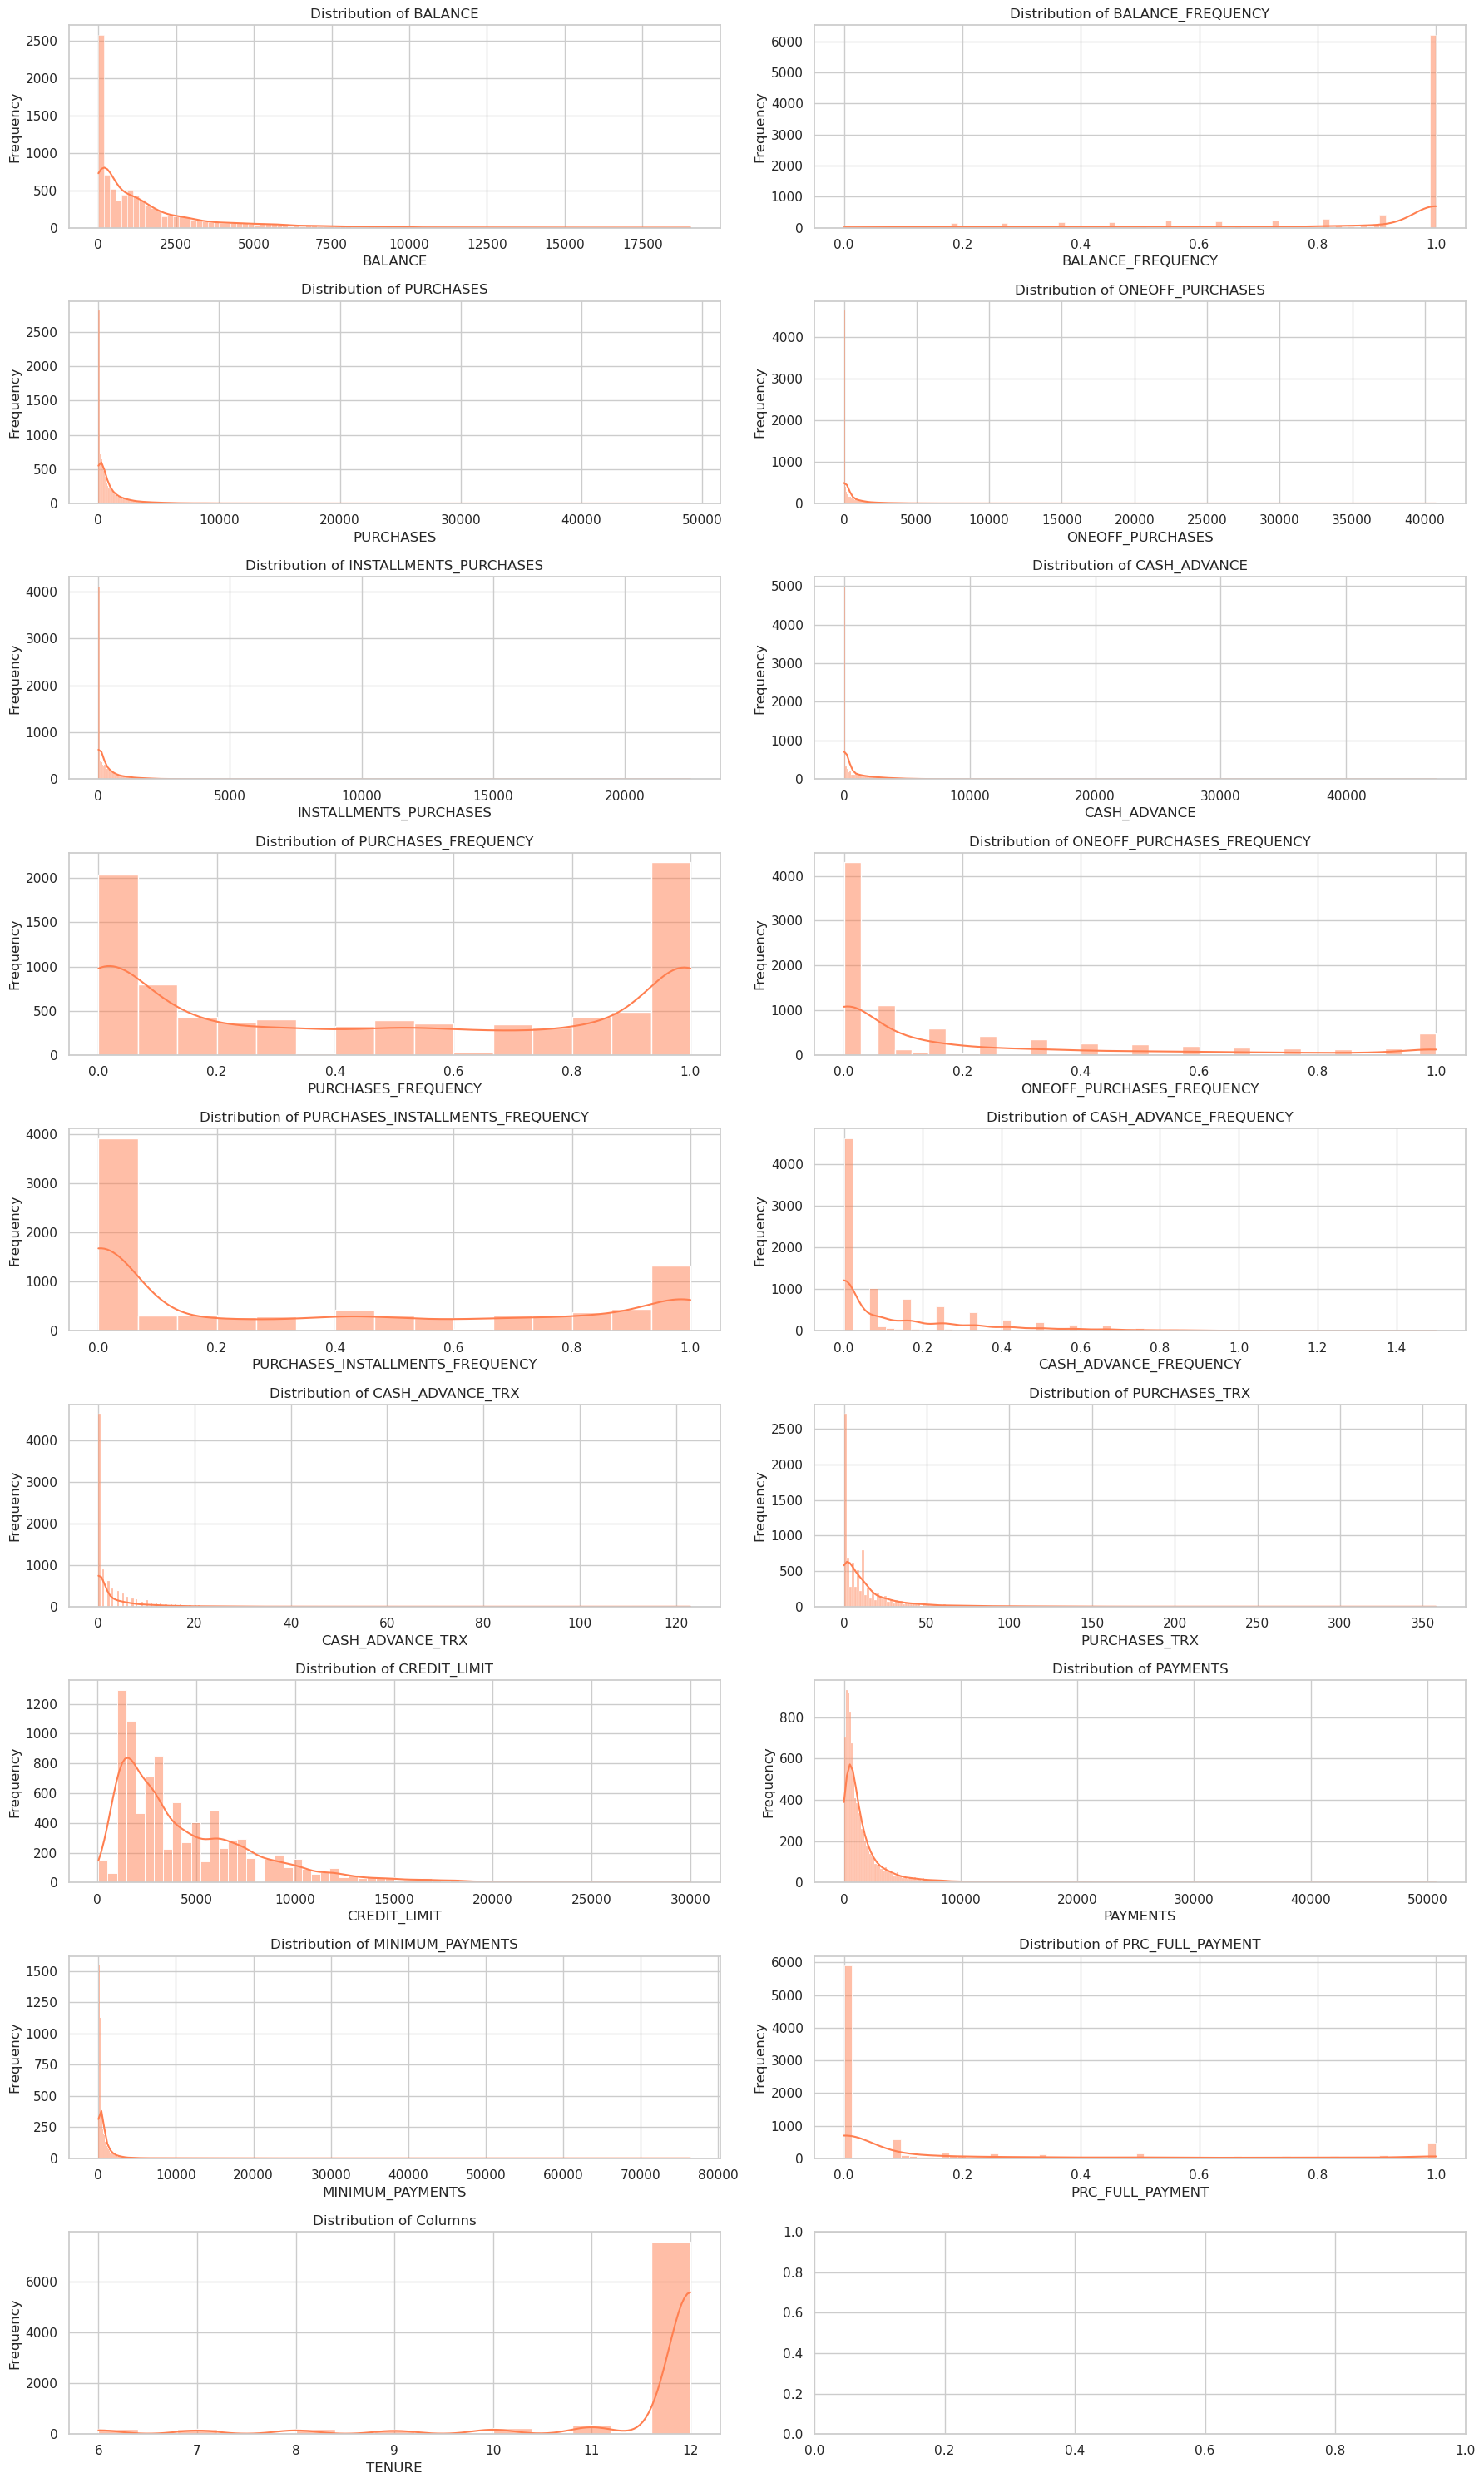

In [448]:
sns.set(style="whitegrid", palette="muted")

num_cols = [column for column in df.columns if df[column].dtype in ['int64', 'float64']]
num_cols_count = len(num_cols)

rows = 9  
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(18, 30))

index = 0

for row in range(rows):
    for col in range(cols):
        if index >=num_cols_count:
            break
        plt.subplot(rows, cols, index + 1)
        sns.histplot(df[num_cols[index]], kde=True, color='coral')
        plt.title(f'Distribution of {num_cols[index]}')
        plt.xlabel(num_cols[index])
        plt.ylabel('Frequency')
        index += 1

plt.tight_layout()
plt.title('Distribution of Columns')
plt.show()

Berdasarkan persebaran data, sebagian besar data cenderung distibusi miring ke kiri (right-skewed) dan nilai tertingginya mendekati nilai 0. Hanya pada kolom tertentu saja yang memiliki perbedaan di antaranya `BALANCE_FREQUENCY` dan `TENURE` yang miring ke kanan (Left-skewed). Setiap fitur numerik menunjukkan adanya outliers. Diasumsikan bahwa nilai-nilai outliers ini relevan untuk penelitian. Kolom yang tidak terdapat outlier adalah `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY`.

**Kesimpulan**
- Pengguna cenderung menggunakan kartu kredit dengan tenure pembayaran selama `12` bulan.
- Kredit Limit Pengguna berkisar antara `0-10000` dan mencapai puncak tertinggi di rentang `0-5000`.
- Jumlah belanja (`Purchase`) yang sering dilakukan pengguna cenderung kecil di bawah `10000`, sehingga jumlah pembayaran dan frequency penggunaan kartu kredit cenderung jarang dan berkisar di nominal yang kecil.
- Pada grafik `PURCHASE_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY` cenderung serupa, sehingga dapat disimpulkan bahwa pembelian yang dilakukan pengguna cenderung dilakukan secara angsuran (`PURCHASES_INSTALLMENTS_FREQUENCY`).

### Purchases Amount

Pada tahap sebelumnya kita sudah mengetahui bahwa pengguna cenderung memilih tenure pembayaran 12 bulan. Sekarang kita akan menghitung nilai minimum, rata-rata dan nilai maksimum dari jumlah belanja pada tiap tenure yang dipilih oleh pengguna.

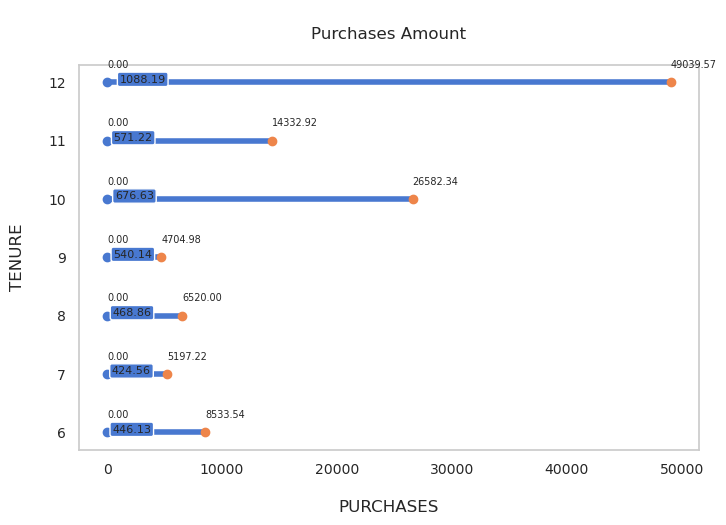

In [197]:
plt.figure(figsize=(8,5))

purc = df[['PURCHASES', 'TENURE']]
purc = purc.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()
tenure = sorted(df['TENURE'].unique())
min_sct = plt.scatter(x=purc['MIN'], y=purc['TENURE'])
max_sct = plt.scatter(x=purc['MAX'], y=purc['TENURE'])

for i in range(len(tenure)):
    purc_x = purc[purc['TENURE']==tenure[i]]
    plt.hlines(y=purc_x['TENURE'], xmin=purc_x['MIN'], xmax=purc_x['MAX'], linewidth=4, zorder=0)
    plt.annotate('{0:.2f}'.format(purc_x['MIN'].values[0]), xy=(purc_x['MIN'].values[0], purc_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(purc_x['AVG'].values[0]), xy=(purc_x['AVG'].values[0], purc_x['TENURE'].values[0]), fontsize=8, bbox=dict(boxstyle='round', pad=0.2))
    plt.annotate('{0:.2f}'.format(purc_x['MAX'].values[0]), xy=(purc_x['MAX'].values[0], purc_x['TENURE'].values[0]+0.25), fontsize=7)

plt.xlabel('\nPURCHASES')
plt.ylabel('TENURE\n')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major')
plt.title('\nPurchases Amount\n')
plt.show()


**Kesimpulan**

Berdasarkan plot di atas, dapat dilihat bahwa pengguna yang memilih Tenure 12 bulan menduduki puncak statistik dengan Jumlah belanja maximum `49039.57` dengan rata-rata jumlah belanja `1088.19`. Tenure 10 bulan menduduki peringkat kedua dengan maksimum jumlah belanja sebesar `26582.34` dan rata-rata jumlah belanja sebesar `676.63`. Tenure 11 bulan menduduki peringkat ketiga dengan maksimum belanja sebesar `14332.92` dan rata-rata `571.22`.

Sekarang kita mencari keterikatan antara Jumlah balance dan Credit Limit.

Text(0.5, 1.0, 'Credit Limit vs Balance')

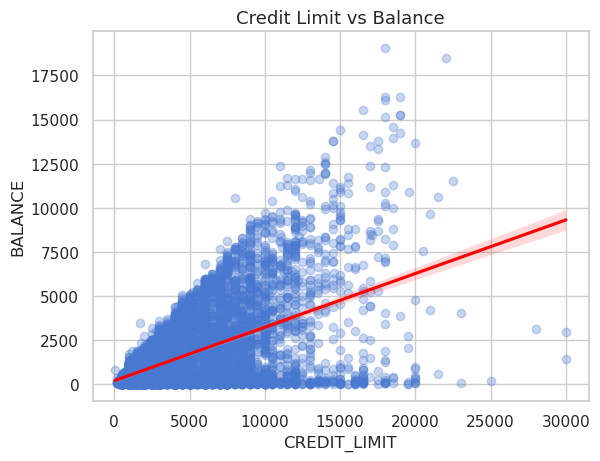

In [199]:
sns.regplot(x='CREDIT_LIMIT', y='BALANCE', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
sns.set_style("whitegrid")
plt.title("Credit Limit vs Balance", fontsize= 13)

**Kesimpulan**

Berdasarkan scatterplot di atas, garis tren yang meningkat menunjukkan adanya korelasi positif antara dua variabel, yang berarti jika semakin tinggi batas kredit, maka jumlah saldo akun kartu kredit juga semakin tinggi. Namun peningkatan pada balance tidak terlalu tinggi.

### Credit Limit & Installments Purchases

Text(0.5, 1.0, 'Credit Limit vs Installments Purchases')

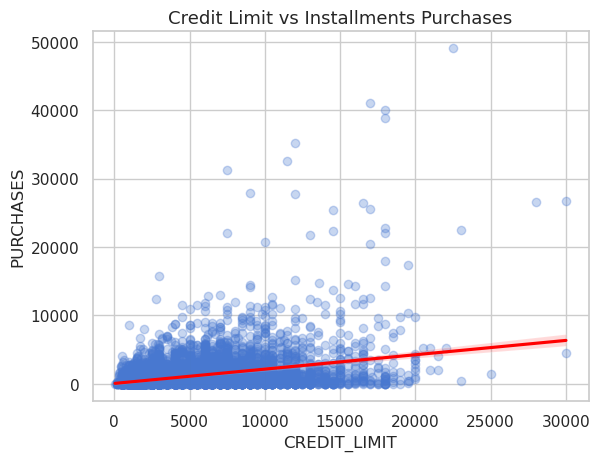

In [200]:
sns.regplot(x='CREDIT_LIMIT', y='PURCHASES', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
sns.set_style("whitegrid")
plt.title("Credit Limit vs Installments Purchases", fontsize= 13)

**Kesimpulan**

Berdasarkan scatterplot di atas, Jumlah pembelian dengan kredit tidak menunjukkan korelasi dengan batas limit kredit, yang artinya semakin tinggi batas limit kartu kredit tidak terlalu berpengaruh pada jumlah pembelian secara angsuran.

### Purchase Frequency

Pada tahap ini kita akan melihat kategori pembayran mana yang paling sering digunakan pengguna untuk melakukan pembelian/belanja.

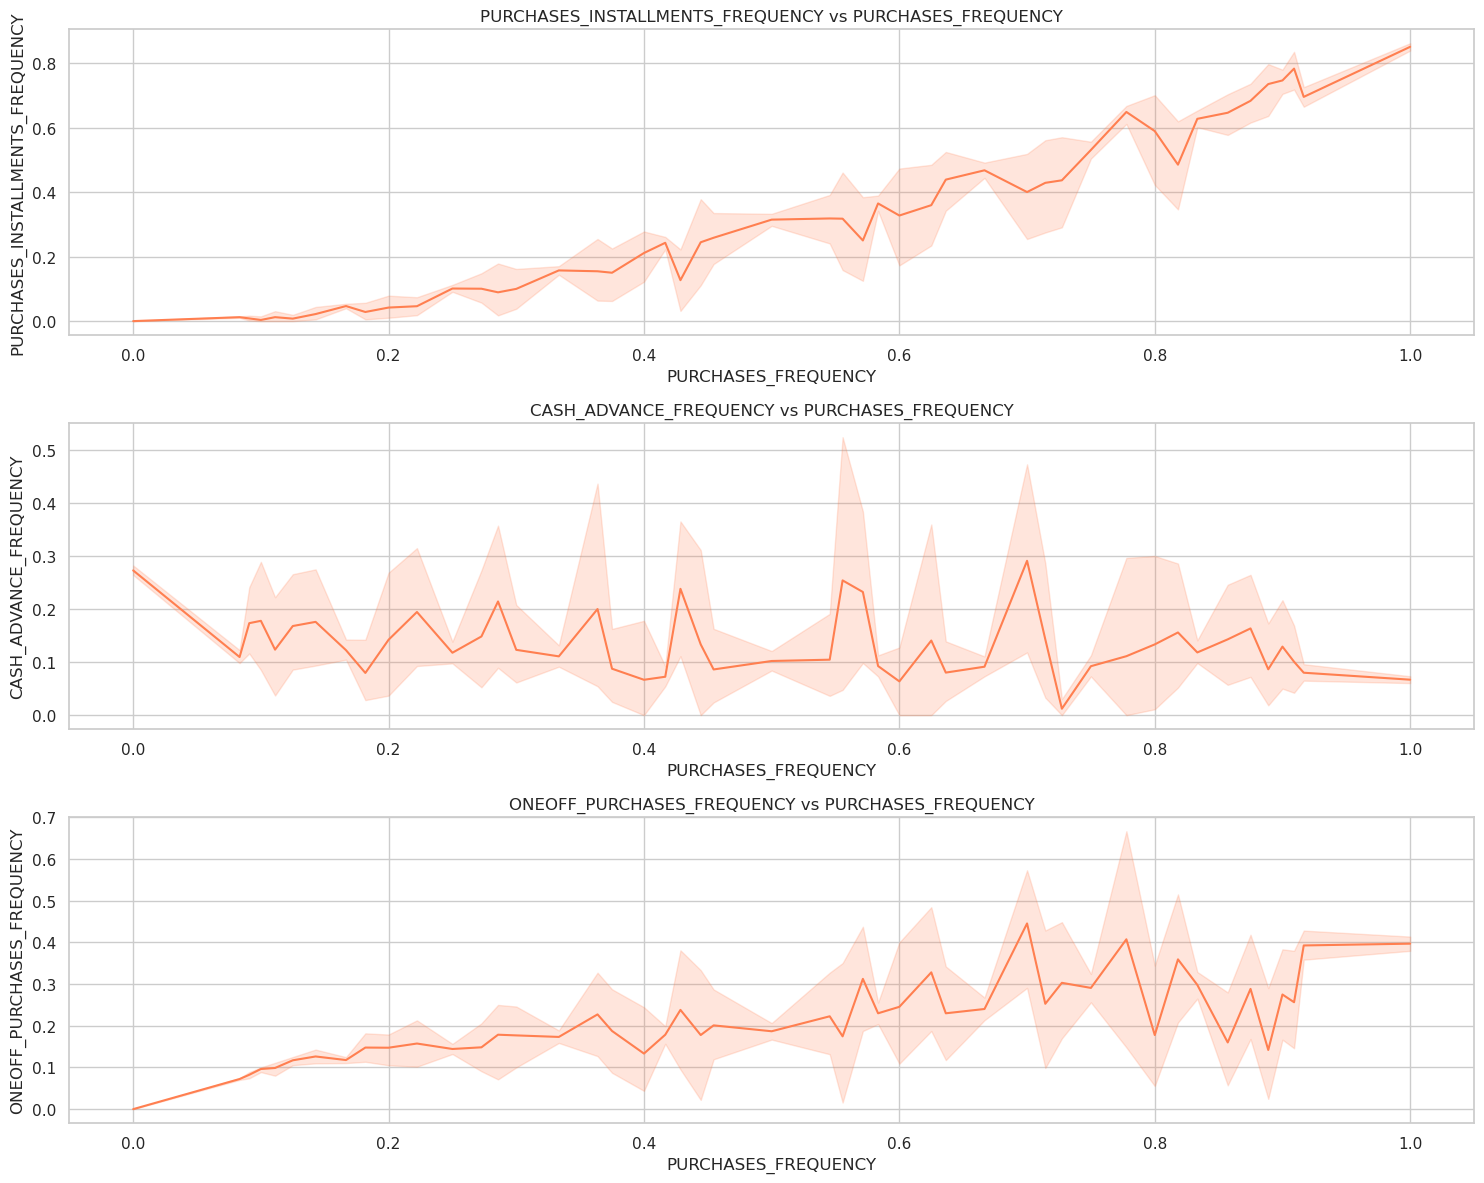

In [201]:
fig, axes = plt.subplots(3, 1, figsize=(15,12))

sns.lineplot(ax=axes[0], x='PURCHASES_FREQUENCY', y='PURCHASES_INSTALLMENTS_FREQUENCY', data=df, color='coral')
axes[0].set_title('PURCHASES_INSTALLMENTS_FREQUENCY vs PURCHASES_FREQUENCY')

sns.lineplot(ax=axes[1], x='PURCHASES_FREQUENCY', y='CASH_ADVANCE_FREQUENCY', data=df, color='coral')
axes[1].set_title('CASH_ADVANCE_FREQUENCY vs PURCHASES_FREQUENCY')

sns.lineplot(ax=axes[2], x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', data=df, color='coral')
axes[2].set_title('ONEOFF_PURCHASES_FREQUENCY vs PURCHASES_FREQUENCY')

plt.tight_layout()

plt.show()

Plot di atas menunjukkan bahwa:
- Semakin tinggi frequensi belanja maka semakin tinggi juga pembayaran dengan angsuran (`PURCHASES_INSTALLMENTS`).
- Pada pembayaran 1 kali (`ONE_OFF_PURCHASES`) grafik cenderung datar.
- Pada penarikan tunai (`CASH_ADVANCE`) grafik menunjukkan kenaikan namun tidak signifikan.

**Kesimpulan**

Berdasarkan uraian di atas dapat disimpulkan bahwa kebayakan pengguna melakukan pembayaran secara angsuran (`PURCHASES_INSTALLMENTS`) kemudian sebagian besarnya lagi melakukan pembelian dengan 1x bayar (`ONE_OFF_PURCHASES`).

### Correlation Map

Selanjutnya, kita akan menghitung korelasi antar attributes.

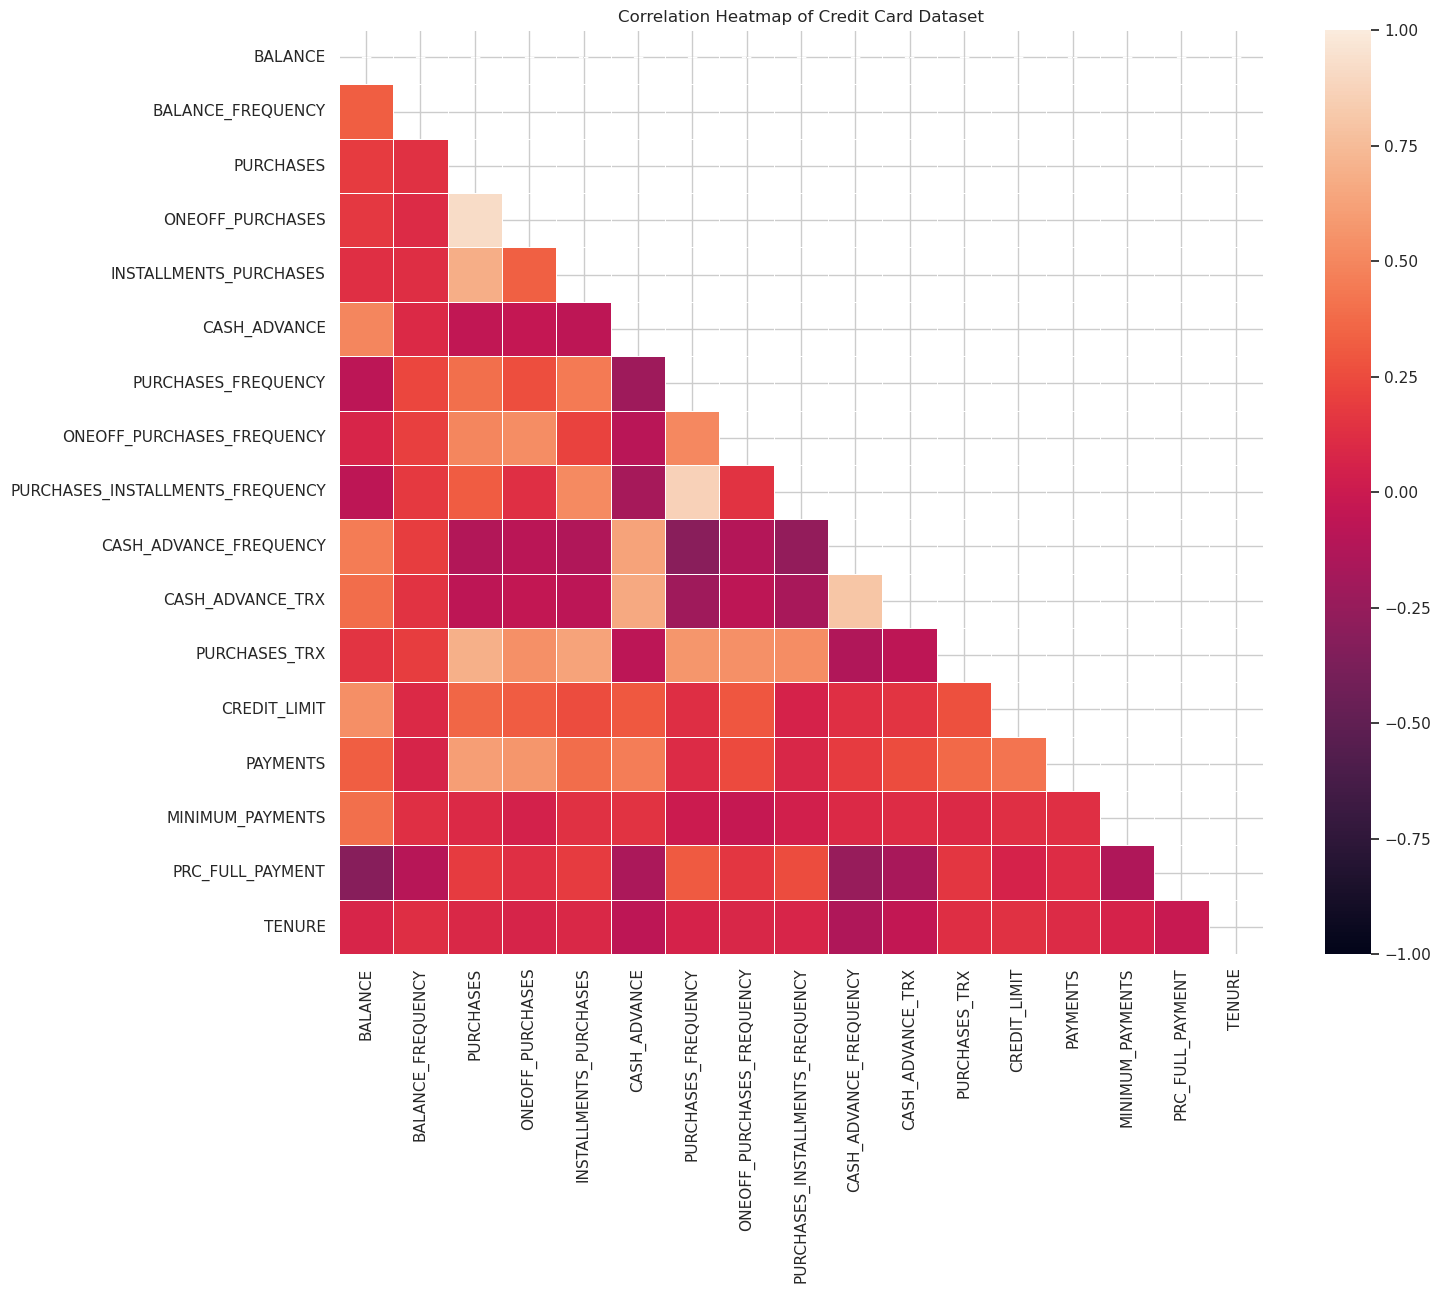

In [202]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap of Credit Card Dataset')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
heatmap = sns.heatmap(correlation,mask=mask, annot=True, fmt='.2f', vmax=1, vmin=-1, square=True, linewidths=.5)
plt.show()

Berdasarkan heatmap di atas fitur yang berkolerasi tinggi adalah sebagai berikut:
- `PURCHASES` dengan `ONEOFF_PURCHASES`
- `PURCHASES_INSTALLMENT_FREQUENCY` dengan `PURCHASES_FREQUENCY`
- `CASH_ADVANCE_TRX` dengan `CASH_ADVANCE_FRQUENCY`

Maka salah satu kolom harus di hapus. Pada kasus ini, kolom yang dihapus adalah `ONEOFF_PURCHASES`, `PURCHASES_FREQUENCY` dan ``CASH_ADVANCE_FRQUENCY``.

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   INSTALLMENTS_PURCHASES            8949 non-null   float64
 4   CASH_ADVANCE                      8949 non-null   float64
 5   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 6   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 7   CASH_ADVANCE_TRX                  8949 non-null   int64  
 8   PURCHASES_TRX                     8949 non-null   int64  
 9   CREDIT_LIMIT                      8949 non-null   float64
 10  PAYMENTS                          8949 non-null   float64
 11  MINIMUM_PAYMENTS                  8949 non-null   float64
 12  PRC_FULL_PA

Berdasarakhan hasil dari EDA, jumlah data yang digunakan pada tahap clustering adalah `8949 baris` dan `14 kolom`

# Preprocessing

### Normalisasi dengan Standar Scaler

Pada kasus ini kita akan melakukan clustering dengan K-Means yang mana metodenya berbasis jarak. Normalisasi dengan Standar Scaler dapat mengurangi perbedaan skala antar fitur, sehingga mempermudah proses K-Means Clustering.

In [223]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [224]:
df_scaled = pd.DataFrame(data=scaled_data, columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.349114,-0.466805,-0.678716,-0.707409,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.454607,2.605438,-0.678716,-0.917090,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159,0.360541
2,0.447041,0.517980,-0.107716,-0.454607,-0.466805,2.673295,-0.917090,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,-0.454607,-0.368678,-0.399383,-0.917090,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.454607,-0.466805,-0.399383,-0.917090,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588,0.360541


Data `df_scaled` merupakan data setelah dilakukan normalisasi. Selanjutnya kita akan menerapkan PCA.

### Principal Component Analysis (PCA)
Principal Component Analysis (PCA) adalah teknik dalam analisis data yang digunakan untuk mereduksi dimensi dari dataset dengan memproyeksikan data ke ruang dimensi yang lebih rendah. PCA dapat membantu mempersiapkan data sehingga algoritma clustering dapat bekerja lebih baik dalam ruang fitur yang direduksi.

Mereduksi data menjadi 2D.

In [225]:
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)


In [226]:
data_pca=pd.DataFrame(data=principal_components, columns=['pca1','pca2'])
data_pca.head()

,pca1,pca2
0,-1.716384,-0.476070
1,-0.002696,2.503003
2,0.495198,0.045191
3,-0.857038,0.204121
4,-1.465124,-0.133917


Berdasarkan output di atas, data sudah direduksi menjadi 2 dimensi data.

## Feature Engineering
### Metode elbow untuk Mencari nilai K optimum pada K-Means

Kita akan melakuian elbow method untuk mencari K optimum dalam clustering kali ini. Selain itu juga dilakukan penghitungan `Silhoutte Score` sebagai parameter pembanding pencarian K optimum.

In [297]:
wcss = []
for i in range(1,20):
   model = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
   model.fit(principal_components)
   wcss.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Methods')

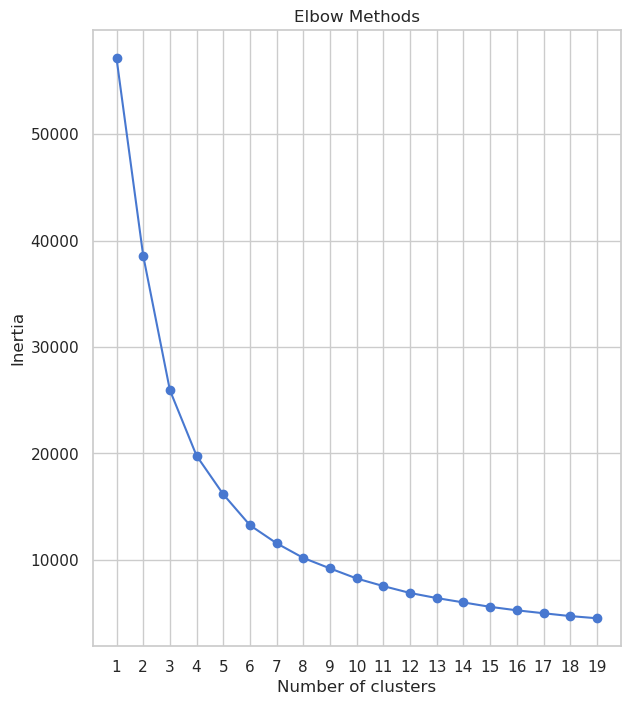

In [298]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(range(1,20), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.xticks([i for i in range(1,20)])
plt.ylabel('Inertia')
plt.title('Elbow Methods')

# plt.subplot(1,2,2)
# plt.plot(range(1,11), sil_score, marker='o')
# plt.xlabel('Number of clusters')
# plt.xticks([i for i in range(1,11)])
# plt.ylabel('Silhoutte Score')
# plt.title('Silhoutte Test')
# plt.show()

Berdasarkan output, dapat dilihat bahwa titik dimana terciptanya bentuk siku pada grafik Elbow terjadi ketika jumlah cluster (K) sama dengan 6-8 cluster.  Karena kita juga harus melihat computation cost saat menentukan jumlah cluster, maka memilih jumlah cluster yang lebih sedikit yaitu 6.

# K-Means Model

Mendefinisikan model K-means dengan nilai K=6

In [365]:
kmeans = KMeans(n_clusters=6)

Melakukan clustering dengan model kmeans yang sudah didefinisikan.

In [366]:
kmeans_model = kmeans.fit_predict(principal_components)
labels = kmeans.labels_ 

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Menyimpan salinan data ke variabel `kmeans_data` kemudian melakukan labeling berdasarkan hasil clusterisasi di tahap sebelumnya.

In [367]:
kmeans_data = df.copy()
kmeans_data['KMeansCluster'] = kmeans.labels_

Menampilkan data yang sudah diberi label.

In [368]:
kmeans_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansCluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.000000,0.083333,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.000000,1,1,7500.0,0.000000,312.452292,0.000000,12,5
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


Visualisasi data yang sudah dilabeli dengan PCA

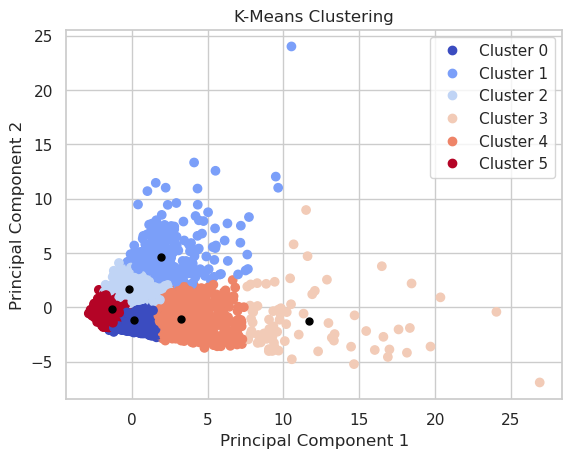

In [369]:
# Visualize the clusters in 2D space
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_model, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black', label = 'Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')

legend_labels = ['Cluster {}'.format(i) for i in range(len(np.unique(kmeans_model)))]
legend_labels.append('Centroids')

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

**Kesimpulan**

Gambar di atas merupakan hasil clustering dengan algoritma K-Means, di mana data awal direduksi menggunakan PCA menjadi dua fitur utama. Dari hasil clustering, terlihat bahwa data berhasil terbagi dengan baik menjadi 6 cluster. Adanya 6 cluster menunjukkan bahwa model K-Means memilih jumlah cluster optimal berdasarkan elbow method.

# Hierarchical Clustering

Mendefinisikan metode hierarchical Clustering yang digunakan.

In [383]:
HC = linkage(df_scaled, method='ward')

Metode penggabungan (linkage method) yang digunakan dalam hierarchical clustering. Metode 'ward' mengukur penurunan dalam dispersi total (variance) setelah penggabungan dua cluster.

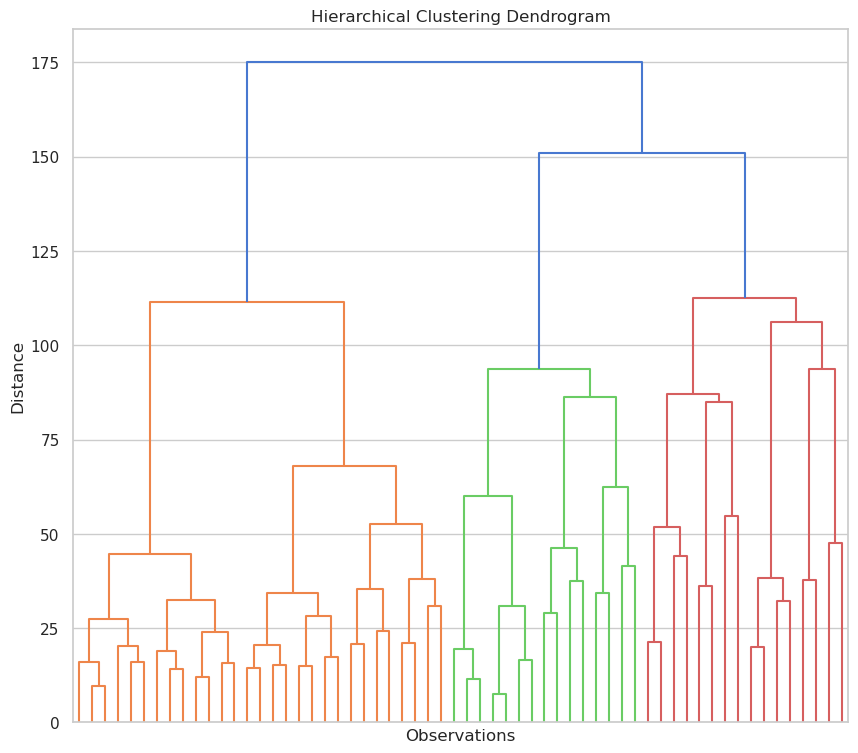

In [418]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(HC, truncate_mode='level', p = 5, show_leaf_counts=True, no_labels=True)
plt.show()

In [401]:
cut_level = 125

In [402]:
labels = fcluster(HC, cut_level, criterion='distance')

In [403]:
HC_data = df.copy()
HC_data['HCluster'] = labels

In [404]:
HC_data['HCluster'].unique()

array([3, 2, 1], dtype=int32)

In [405]:
HC_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,HCluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.000000,0.083333,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.000000,1,1,7500.0,0.000000,312.452292,0.000000,12,3
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


# Conclusion